<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter9/Markov_switching_model.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "17"

In [24]:
dta = pd.read_stata('https://www.stata-press.com/data/r14/rgnp.dta').iloc[1:]
dta.index = pd.DatetimeIndex(dta.date, freq='QS')
dta_hamilton = dta.rgnp

<AxesSubplot:title={'center':'Growth rate of Real GNP'}, xlabel='date'>

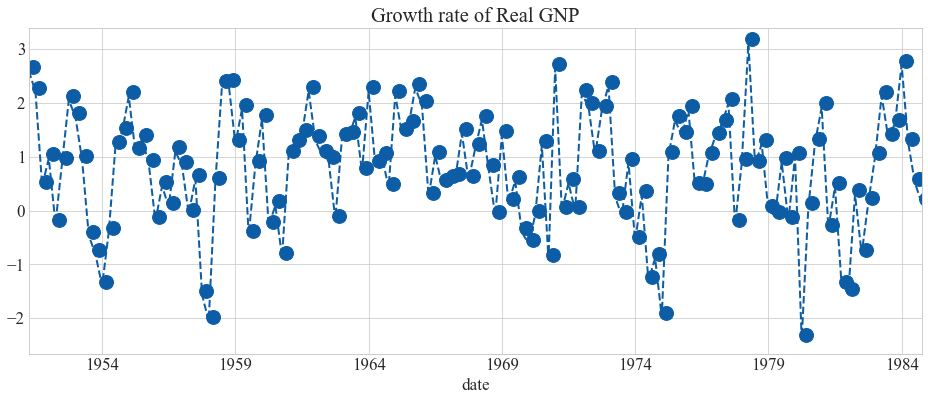

In [27]:
# Plot the data
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(16, 6))

In [28]:
# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

In [30]:
print(res_hamilton.summary())

                         Markov Switching Model Results                         
Dep. Variable:                        y   No. Observations:                  131
Model:             MarkovAutoregression   Log Likelihood                -181.263
Date:                  Sun, 12 Sep 2021   AIC                            380.527
Time:                          19:40:42   BIC                            406.404
Sample:                      04-01-1951   HQIC                           391.042
                           - 10-01-1984                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3588      0.265     -1.356      0.175      -0.877       0.160
                             Regime 

In [22]:
res_hamilton.expected_durations

array([ 4.07604793, 10.4258926 ])

In [24]:
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

In [29]:
usrec.head()

,USREC
DATE,
1947-01-01,0
1947-02-01,0
1947-03-01,0
1947-04-01,0
1947-05-01,0


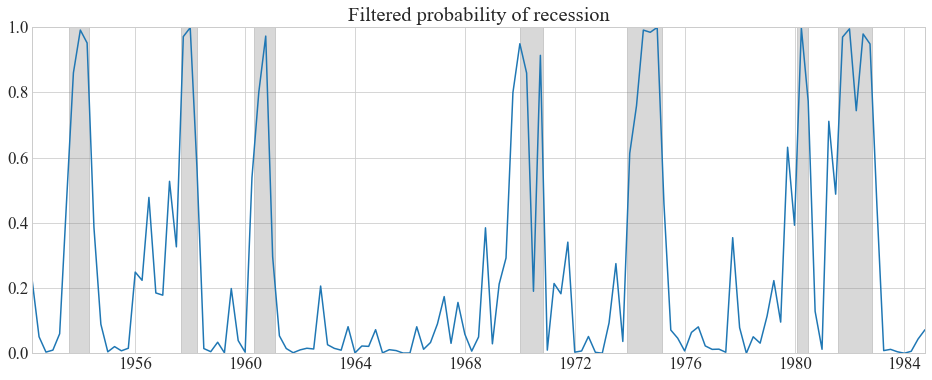

In [43]:
_, ax = plt.subplots(1, figsize=(16, 6))
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(
    usrec.index, 0, 1, where=usrec['USREC'].values,
    color='gray', alpha=0.3
)
ax.set(
    xlim=(dta_hamilton.index[4], dta_hamilton.index[-1]),
    ylim=(0, 1),
    title='Filtered probability of recession'
);